## CIFAR DATASET

In [1]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(X_train_10, y_train_10), (X_test_10, y_test_10) = tf.keras.datasets.cifar10.load_data()

# Load the CIFAR-100 dataset
(X_train_100, y_train_100), (X_test_100, y_test_100) = tf.keras.datasets.cifar100.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Normalize pixel values to be between 0 and 1
X_train_100_normalized = X_train_100.astype('float32') / 255.0
X_test_100_normalized = X_test_100.astype('float32') / 255.0

# Define the CNN model architecture for CIFAR-100
model_cifar100 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax') # 100 classes for CIFAR-100
])

# Compile the model
model_cifar100.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Display model summary
print("\nCIFAR-100 Model Summary:")
model_cifar100.summary()

# Train the model
print("\nTraining CIFAR-100 Model...")
history_cifar100 = model_cifar100.fit(X_train_100_normalized, y_train_100,
                                     epochs=10, # You can adjust the number of epochs
                                     validation_data=(X_test_100_normalized, y_test_100),
                                     batch_size=64)

# Evaluate the model on the test data
print("\nEvaluating CIFAR-100 Model on test data...")
test_loss_cifar100, test_acc_cifar100 = model_cifar100.evaluate(X_test_100_normalized, y_test_100, verbose=2)
print(f"\nCIFAR-100 Test Accuracy: {test_acc_cifar100:.4f}")
print(f"CIFAR-100 Test Loss: {test_loss_cifar100:.4f}")


CIFAR-100 Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,420 (1.41 MB)

 Trainable params: 368,420 (1.41 MB)

 Non-trainable params: 0 (0.00 B)


Training CIFAR-100 Model...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.0574 - loss: 4.2177 - val_accuracy: 0.1699 - val_loss: 3.4744
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.1988 - loss: 3.3274 - val_accuracy: 0.2523 - val_loss: 3.1003
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.2697 - loss: 2.9453 - val_accuracy: 0.2796 - val_loss: 2.9297
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.3135 - loss: 2.7362 - val_accuracy: 0.3032 - val_loss: 2.8060
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3514 - loss: 2.5436 - val_accuracy: 0.3419 - val_loss: 2.6343
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3846 - loss: 2.3800 - val_accuracy: 0.3505 - val_loss: 2.5692
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.4168 - loss: 2.2426 - val_accuracy: 0.3779 - val_loss: 2.5008
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accur

In [4]:
# Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model_cifar100)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('cifar100_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TensorFlow Lite model saved as cifar100_model.tflite")

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='cifar100_model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Get a sample image from the test set for inference
sample_index = 0  # You can change this index to test different images
sample_image = X_test_100_normalized[sample_index]
sample_label = y_test_100[sample_index]

# The interpreter expects a batch dimension, so add one
input_shape = input_details[0]['shape']
input_data = np.expand_dims(sample_image, axis=0).astype(input_details[0]['dtype'])

# Set the tensor and invoke the interpreter
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# Get the output predictions
output_data = interpreter.get_tensor(output_details[0]['index'])

# Interpret the results
predicted_class = np.argmax(output_data[0])

print(f"\nSample Image Index: {sample_index}")
print(f"Original Model Input Shape: {X_test_100_normalized.shape}")
print(f"TFLite Model Input Shape: {input_shape}")
print(f"Actual label: {sample_label}")
print(f"Predicted label (TFLite): {predicted_class}")

# Optionally, you can also compare with the original model's prediction
original_model_prediction = model_cifar100.predict(np.expand_dims(sample_image, axis=0))
original_predicted_class = np.argmax(original_model_prediction[0])
print(f"Predicted label (Original Keras Model): {original_predicted_class}")

Saved artifact at '/tmp/tmpaci1la7f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_74')
Output Type:
  TensorSpec(shape=(None, 100), dtype=tf.float32, name=None)
Captures:
  139272280219024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139272280213264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139272280212880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139272280214032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139272280212304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139272280212496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139272280215952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139272280211536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139272280214800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139272280213456: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Li

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Predicted label (Original Keras Model): 56


In [5]:
import numpy as np

print("\n--- Simulating Production Deployment ---")

# Load the TFLite model from the saved file
interpreter_prod = tf.lite.Interpreter(model_path='cifar100_model.tflite')
interpreter_prod.allocate_tensors()

# Get input and output details for the loaded model
input_details_prod = interpreter_prod.get_input_details()
output_details_prod = interpreter_prod.get_output_details()

# Prepare a new sample for inference (e.g., from your test set or a new image)
# For demonstration, we'll use another image from the test set (e.g., index 1)
sample_index_prod = 1
new_sample_image = X_test_100_normalized[sample_index_prod]
new_sample_label = y_test_100[sample_index_prod]

# The interpreter expects a batch dimension, so add one
input_data_prod = np.expand_dims(new_sample_image, axis=0).astype(input_details_prod[0]['dtype'])

print(f"\nSample Image Index for Production Test: {sample_index_prod}")
print(f"Input shape for TFLite model: {input_details_prod[0]['shape']}")
print(f"Actual label for this sample: {new_sample_label}")

# Set the tensor and invoke the interpreter for prediction
interpreter_prod.set_tensor(input_details_prod[0]['index'], input_data_prod)
interpreter_prod.invoke()

# Get the output predictions
output_data_prod = interpreter_prod.get_tensor(output_details_prod[0]['index'])

# Interpret the results
predicted_class_prod = np.argmax(output_data_prod[0])

print(f"Predicted label (TFLite in production simulation): {predicted_class_prod}")

# Optional: Compare with the original Keras model prediction
original_model_prediction_prod = model_cifar100.predict(np.expand_dims(new_sample_image, axis=0))
original_predicted_class_prod = np.argmax(original_model_prediction_prod[0])
print(f"Predicted label (Original Keras Model for comparison): {original_predicted_class_prod}")

print("\nThis code demonstrates how your 'cifar100_model.tflite' could be loaded and used for inference in a production-like environment.")
print("For full deployment, you would integrate this loading and prediction logic into your target application (e.g., a mobile app, an edge device application, or a serverless function).")


--- Simulating Production Deployment ---

Sample Image Index for Production Test: 1
Input shape for TFLite model: [ 1 32 32  3]
Actual label for this sample: [33]
Predicted label (TFLite in production simulation): 33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted label (Original Keras Model for comparison): 33

This code demonstrates how your 'cifar100_model.tflite' could be loaded and used for inference in a production-like environment.
For full deployment, you would integrate this loading and prediction logic into your target application (e.g., a mobile app, an edge device application, or a serverless function).


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


## MNIST DATASET

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 145.1 MB/s eta 0:00:00
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


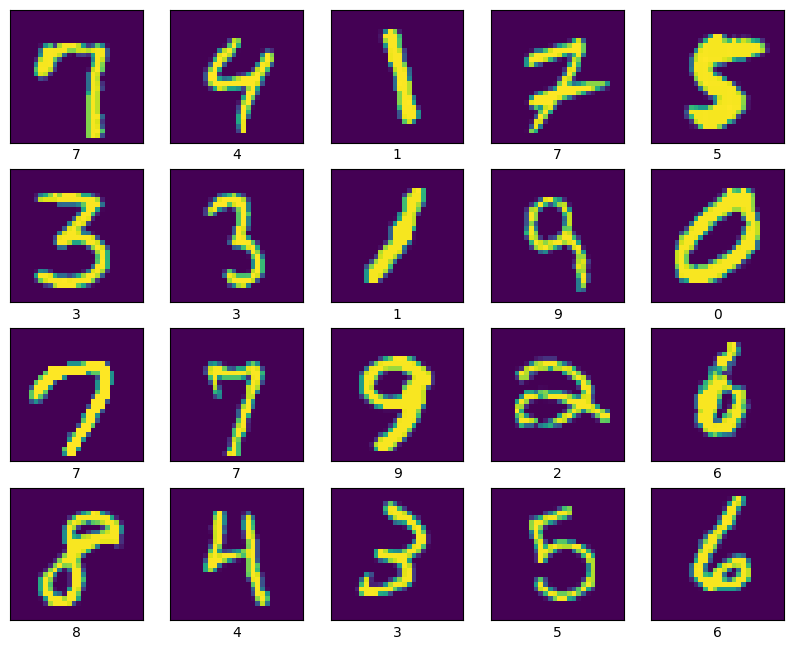

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8755 - loss: 0.3871 - val_accuracy: 0.9787 - val_loss: 0.0698
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9832 - loss: 0.0535 - val_accuracy: 0.9844 - val_loss: 0.0499
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9892 - loss: 0.0350 - val_accuracy: 0.9870 - val_loss: 0.0440
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9869 - val_loss: 0.0506
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9932 - loss: 0.0217 - val_accuracy: 0.9887 - val_loss: 0.0373
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9960 - loss: 0.0129 - val_accuracy: 0.9835 - val_loss: 0.0589
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9952 - loss: 0.0146 - val_accuracy: 0.9884 - val_loss: 0.0437
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9966 -

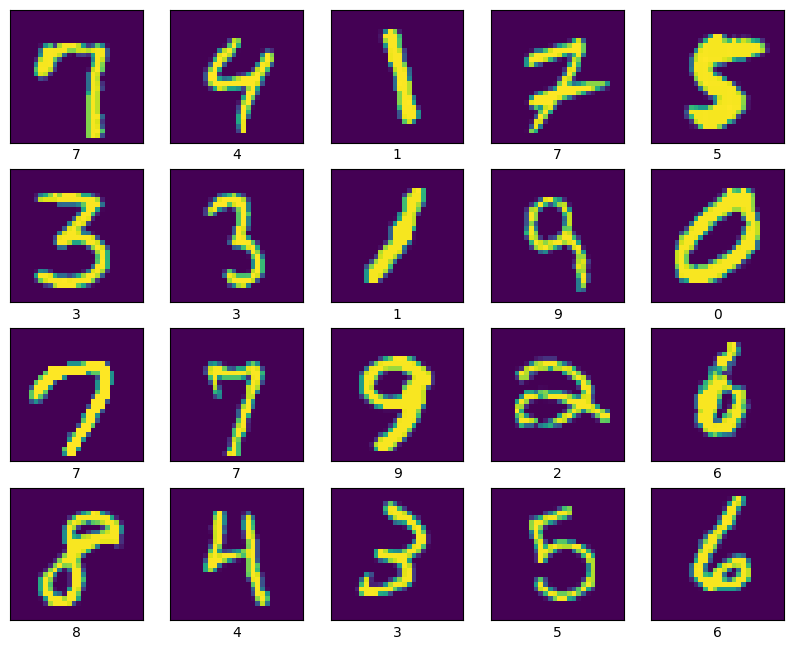

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.8727 - loss: 0.4081 - val_accuracy: 0.9815 - val_loss: 0.0643
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9806 - loss: 0.0597 - val_accuracy: 0.9851 - val_loss: 0.0487
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9884 - loss: 0.0350 - val_accuracy: 0.9851 - val_loss: 0.0510
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9887 - val_loss: 0.0484
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9875 - val_loss: 0.0440
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9888 - val_loss: 0.0451
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9896 - val_loss: 0.0418
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9952 -

In [2]:
# -*- coding: utf-8 -*-
"""wk11-cnnOnly.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/18Yteof1rsZ_tquOtOwuh6BVa-UKESHyI
"""

!pip install streamlit

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import streamlit as st
from sklearn.model_selection import train_test_split

def two_split(X, y, holdout_frac=0.2, test_size=0.2, random_state=42):
  X_hold, X_rest, y_hold, y_rest = train_test_split(X, y, test_size=1-holdout_frac, random_state=random_state)
  X_train, X_test, y_train, y_test = train_test_split(X_rest, y_rest, test_size=test_size, random_state=random_state)
  return X_hold, X_train, X_test, y_hold, y_train, y_test

def report_stats(y_true, y_pred, prefix=""):
  mae=mean_absolute_error(y_true, y_pred)
  mse=mean_squared_error(y_true, y_pred)
  rsme=mse**0.5
  r2=r2_score(y_true,y_pred)
  print(f"{prefix} MAE: {mae:.2f}")
  print(f"{prefix} MSE: {mse:.2f}")
  print(f"{prefix} RSME: {rsme:.2f}")
  print(f"{prefix} R2: {r2:.2f}")
  return{"mae": mae,"mse": mse, "rsme": rsme, "r2": r2 }

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test =x_train/ 255.0, x_test/ 255.0
x_train=x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test=x_test.reshape((x_test.shape[0], 28, 28, 1))

X=tf.concat([x_train, x_test], axis=0)
y=tf.concat([y_train, y_test], axis=0)

X_hold, X_train, X_test, y_hold, y_train, y_test = two_split(X.numpy(), y.numpy(), holdout_frac=0.2, test_size=0.2, random_state=42)

class_names = ["0","1","2","3","4","5","6","7","8","9"]
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

model= models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=["accuracy"])
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test =x_train/ 255.0, x_test/ 255.0
x_train=x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test=x_test.reshape((x_test.shape[0], 28, 28, 1))

X=tf.concat([x_train, x_test], axis=0)
y=tf.concat([y_train, y_test], axis=0)

X_hold, X_train, X_test, y_hold, y_train, y_test = two_split(X.numpy(), y.numpy(), holdout_frac=0.2, test_size=0.2, random_state=42)

class_names = ["0","1","2","3","4","5","6","7","8","9"]
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

model= models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=["accuracy"])
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

holdout_loss, holdout_acc = model.evaluate(X_hold, y_hold, verbose=2)
print(f"Final Holdout Loss: {holdout_loss:.4f} | Accuracy: {holdout_acc:.4f}")